# Dust Analysis

In [ ]:
%%capture
cd ~/Dropbox/Msci-DustyPlasmas/Code

## Import dependencies

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
matplotlib.style.use('ggplot')
import numpy
import msci.dustyplasma_cpp.dustcpp_wrapper as dcpp
import matplotlib.pyplot as plt
from IPython import get_ipython
import msci.analysis.constants as const
import math
import numpy

In [3]:
from IPython.display import HTML

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
from analysis_dust import BEffectsAnalysis
from utils.utils import generate_particle_equilibrium_positions, prepare_modified_b_field
from plots import dustplots

from IPython import get_ipython

## Run Dust Analysis

In [6]:
beffect1 = BEffectsAnalysis()
beffect1.create_particles(
    numparticles=10,
    initpositions=generate_particle_equilibrium_positions()
)
beffect1.create_pairs()
beffect1.interact_and_iterate(
    iterationsB=500,
    init_iterations=500,
    method='NoGibs',
    modified_b_field=prepare_modified_b_field()
)
beffect1.sort_positions_of_particles()

  0%|          | 0/500 [00:00<?, ?it/s]/Users/yuewang/Dropbox/Msci-DustyPlasmas/Code/particles/dust.py:151: RuntimeWarning: invalid value encountered in true_divide
  connecti = numpy.array([self.pos1[0] - g2.pos1[0], self.pos1[1] - g2.pos1[1], self.pos1[2] - g2.pos1[2]]) / di
100%|██████████| 500/500 [00:01<00:00, 384.31it/s]


In [ ]:
%%capture
anim = dustplots.plot(beffect1, False, jn=True)

## Animation

In [ ]:
# HTML(anim.to_html5_video())

# Plot magnitude of combined curvature and grad B drifts vs EXB drift without collisional effects to show the regions where either is dominant. No Gibson field used (NB: sheath included)

In [1]:
%%capture
cd ~/Documents/Repos/dusty-plasmas/msci/analysis

In [2]:
%load_ext autoreload
%autoreload 2

In [5]:
from msci.particles.dust import Dust
from msci.utils.utils import generate_particle_equilibrium_positions, prepare_modified_b_field
from msci.analysis.analysis_dust import BEffectsAnalysis
import msci.analysis.constants as const

In [10]:
positions = numpy.arange(const.lambdaD, 0.0035, 3*const.lambdaD)
magcombinevel = []
magexbvel =[]
def norm(x):
    return numpy.sqrt(x[0]**2+x[1]**2+x[2]**2)

for i in positions:
    g0 = Dust(const, const.md, const.radd, const.lambdaD, const.phia, const.Zd * const.e, [0, 0, 0], [0, 0, 0],[0, 0, 0])
    g0.Bswitch = True
    g0.pos = [i,0,0.0003825734]
    magcombinevel.append(norm(g0.combinedrift(B=g0.dipoleB(r=const.dipolepos))))
    magexbvel.append(norm(g0.EXBDRIFT(B=g0.dipoleB(r=const.dipolepos))))


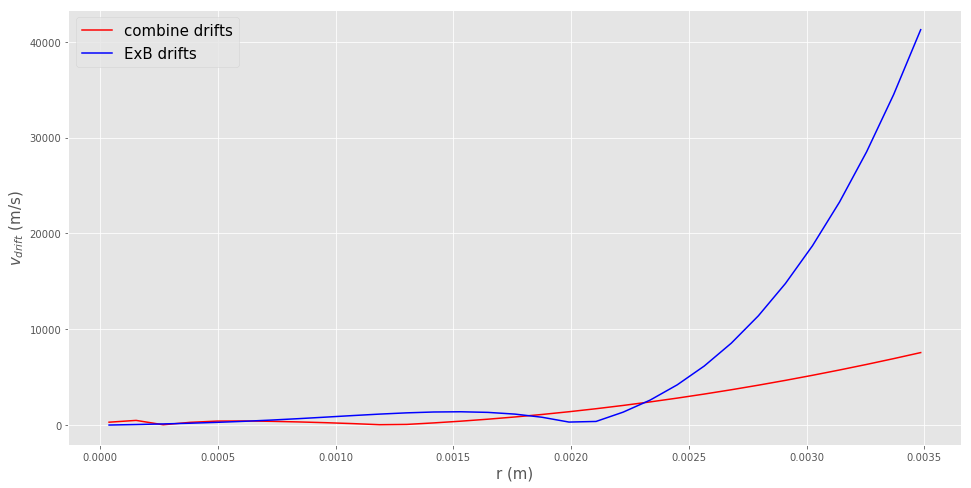

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))
ax.plot(positions,magcombinevel,'r-',label='combine drifts')
ax.plot(positions,magexbvel,'b-', label='ExB drifts')
ax.set_xlabel("r (m)",fontsize=15)
ax.set_ylabel(r'$v_{drift}$ (m/s)',fontsize=15)
ax.legend(fontsize=15);

# Plotting the magnitude of forces that causes dust particle rotation at a specific distance away. Forces under consideration: EXB Hybrid ion drag (including gradB and curvature drifts), vxBforce. No Gibson E field modification.

In [15]:
def norm(x):
    return numpy.sqrt(x[0]**2+x[1]**2+x[2]**2)

beffect1 = BEffectsAnalysis(const)
beffect1.create_particles(
    numparticles=500,
    initpositions=generate_particle_equilibrium_positions()
)
beffect1.create_pairs()
beffect1.interact_and_iterate(
    iterationsB=2000,
    init_iterations=100,
    method='NoGibs',
    modified_b_field=prepare_modified_b_field(),
    combineddrifts=False
)
beffect1.sort_positions_of_particles()


  0%|          | 0/100 [00:00<?, ?it/s]/Users/yuewang/Documents/Repos/dusty-plasmas/msci/particles/dust.py:150: RuntimeWarning: invalid value encountered in true_divide
  connecti = numpy.array([self.pos1[0] - g2.pos1[0], self.pos1[1] - g2.pos1[1], self.pos1[2] - g2.pos1[2]]) / di
100%|██████████| 2000/2000 [19:31<00:00,  1.71it/s]


In [21]:
vxbforcelist = []
positions = []
velocities = []
radialfield=[]
crossnosheath = []
crosswithsheath = []
Bfield=[]
exbonlydriftforcelist = []
combinedriftforcelist = []

for i in beffect1.dustdict:
    positions.append(numpy.sqrt(beffect1.dustdict[i].pos[0]**2+beffect1.dustdict[i].pos[1]**2))
    velocities.append(norm(beffect1.dustdict[i].vel))
    radialfield.append(norm(beffect1.dustdict[i].radialfield()))
    normB=norm(beffect1.dustdict[i].dipoleB(const.dipolepos))
    Bfield.append(beffect1.dustdict[i].dipoleB(const.dipolepos)[2])
    crosswithsheath.append(norm(numpy.cross(beffect1.dustdict[i].radialfield()+beffect1.dustdict[i].sheathfield(),beffect1.dustdict[i].dipoleB(const.dipolepos))/normB**2))
    crossnosheath.append(norm(numpy.cross(beffect1.dustdict[i].radialfield(),beffect1.dustdict[i].dipoleB(const.dipolepos))/normB**2))
    vxbforcelist.append(norm(beffect1.dustdict[i].vxBforce()))
    exbonlydriftforcelist.append(const.md*norm(beffect1.dustdict[i].EXBacchybrid(B=beffect1.dustdict[i].dipoleB(const.dipolepos),combinedrifts=False)))
    combinedriftforcelist.append(const.md*norm(beffect1.dustdict[i].EXBacchybrid(B=beffect1.dustdict[i].dipoleB(const.dipolepos),combinedrifts=True)))



# Plot of size of combined ion drag forces (exb only) vs q(vxB) force directly on dust from B field (sheath included)

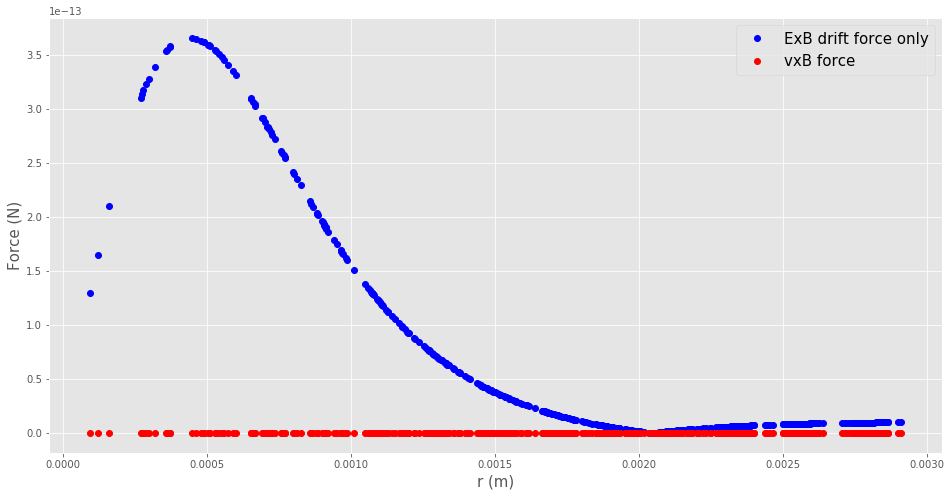

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))

ax.plot(positions,numpy.array(exbonlydriftforcelist),'bo',label='ExB drift force only')
ax.plot(positions,vxbforcelist,'ro',label='vxB force')
ax.set_xlabel("r (m)", fontsize=15)
ax.set_ylabel("Force (N)", fontsize=15)
ax.legend(fontsize=15);

# Plot of size of combined ion drag forces (exb + curvature + grad B) vs q(vxB) force directly on dust from B field (sheath included)

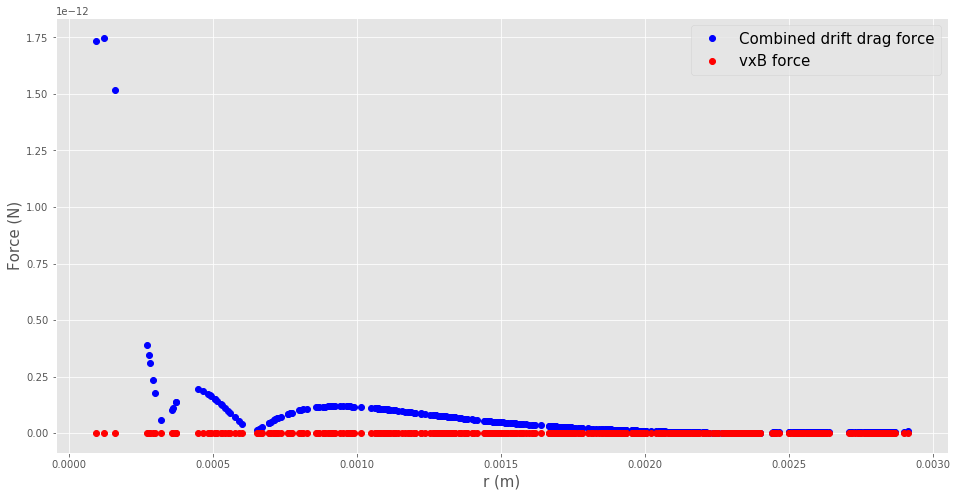

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))

ax.plot(positions,numpy.array(combinedriftforcelist),'bo',label='Combined drift drag force')
ax.plot(positions,vxbforcelist,'ro',label='vxB force')
ax.set_xlabel("r (m)", fontsize=15)
ax.set_ylabel("Force (N)", fontsize=15)
ax.legend(fontsize=15);

With the EXB drift as the only source of drag, we have only 1 zero point for the drag force, this is at around $r \approx 0.002$ instead of earlier on where the B field changed direction because the sheathfield is included (See next point). When the curvature and gradB is included, the force has 2 extra zeros (since the curvature and gradB drag is in the opposite direction to the EXB).

# Plot of the strength of the drift velocity $v_{drift} = \frac{E \times B}{B^2}$ against the the radial distance (NO SHEATH FIELD INCLUDED IN THE CROSS PRODUCT)

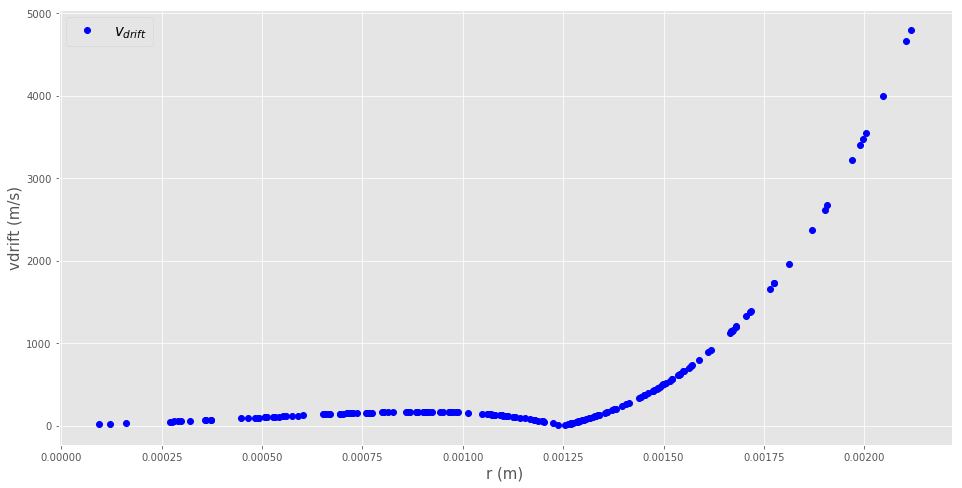

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))

ax.plot(positions[0:200],crossnosheath[0:200],'bo',label=r'$v_{drift}$')
ax.set_xlabel("r (m)", fontsize=15)
ax.set_ylabel("vdrift (m/s)", fontsize=15)
ax.legend(fontsize=15);

Notice that at the cross product goes to zero at a specific radial distance *r* where where z component of the **B** field $\rightarrow 0$ so that the cross product between the radial E field and **B** field $\rightarrow 0$. This $B_z=0$ occurs around r = 0.00125, which is shown in the above figure.

# Plot of the strength of the drift velocity $v_{drift} = \frac{E \times B}{B^2}$ against the the radial distance (SHEATH FIELD IS INCLUDED IN THE CROSS PRODUCT)

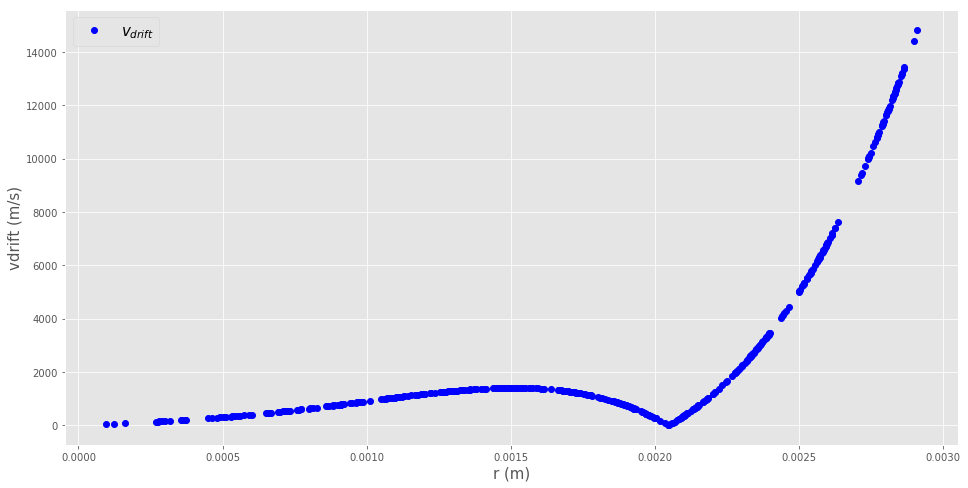

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))

ax.plot(positions,crosswithsheath,'bo',label=r'$v_{drift}$')
ax.set_xlabel("r (m)", fontsize=15)
ax.set_ylabel("vdrift (m/s)", fontsize=15)
ax.legend(fontsize=15);

Here, the sheath electric field is also included! Notice the shape of the vdrift stays the same but the zero of the function is shifted to a larger r value. This can be explained by looking at the direction of the EXB drift. Before we reach the point where $B_z$ changes direction, both the $E \times B$ vector is pointing in the same direction (radial E cross $B_z$ and sheath E cross $B_r$). This means that when the first cross product involving $B_z \rightarrow 0$, there is still the component due to the sheath. However after we pass the point where the $B_z$ value changes direction, the radial E cross $B_z$ component is now in the opposite direction to the sheath E field cross $B_r$ and thus this will decrease the total drift velocity to zero again at a later distance as shown in the figure at $r \approx 0.002$

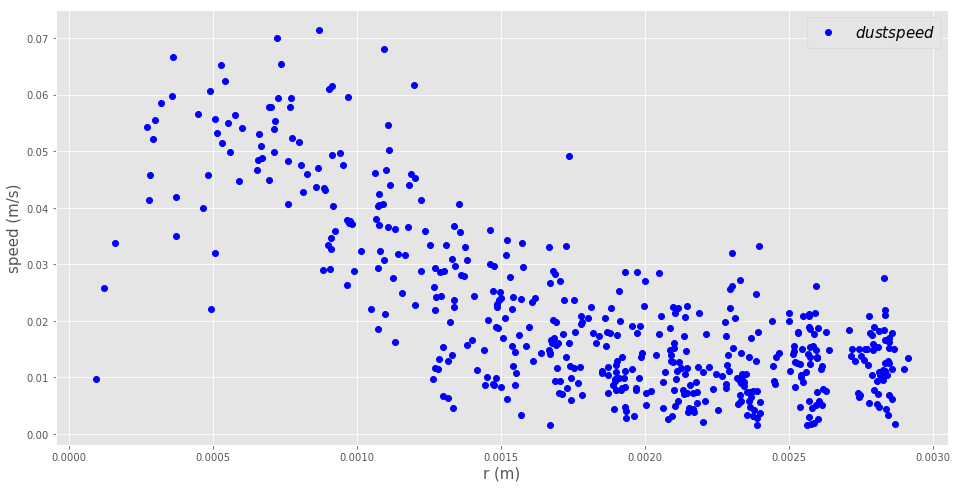

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))

ax.plot(positions,velocities,'bo',label=r'$dust speed$')
ax.set_xlabel("r (m)", fontsize=15)
ax.set_ylabel("speed (m/s)", fontsize=15)
ax.legend(fontsize=15);

# Vary the magnetic moment to increase the B field strength and plot the velocity at specific distances away against this change in dipole B field strength (including all drifts exb + grad B + curvature)

In [ ]:
beffectlist = []
Bmomstrength = numpy.arange(0.014,1,0.025)
import pickle

def norm(x):
    return numpy.sqrt(x[0]**2+x[1]**2+x[2]**2)

for i in numpy.arange(len(Bmomstrength)):
    beffecttemp = BEffectsAnalysis(const)
    beffecttemp.const.Bmom = ((2 * math.pi * (0.003) ** 3) * Bmomstrength[i] / beffecttemp.const.mu0) * numpy.array(
    [0, 0, 1])
    beffecttemp.const.magBmom = norm(beffecttemp.const.Bmom)
    beffecttemp.const.Bmomhat = numpy.array(beffecttemp.const.Bmom) / beffecttemp.const.magBmom
    beffecttemp.create_particles(
        numparticles=300,
        initpositions=generate_particle_equilibrium_positions()
    )
    beffecttemp.create_pairs()
    beffecttemp.interact_and_iterate(
        iterationsB=2000,
        init_iterations=100,
        method='NoGibs',
        modified_b_field=prepare_modified_b_field(),
        combinedrifts = True
    )
    beffectlist.append(beffecttemp)
filehandler = open('speedvsB','wb')
pickle.dump(beffectlist,filehandler)
filehandler.close()
    

  0%|          | 0/100 [00:00<?, ?it/s]/Users/yuewang/Documents/Repos/dusty-plasmas/msci/particles/dust.py:150: RuntimeWarning: invalid value encountered in true_divide
  connecti = numpy.array([self.pos1[0] - g2.pos1[0], self.pos1[1] - g2.pos1[1], self.pos1[2] - g2.pos1[2]]) / di
  5%|▌         | 107/2000 [01:38<28:54,  1.09it/s]

In [1]:
speeds = []
positions = []
for i in beffectlist:
    minlist = []
    for j in i.dustdict:
        POS = i.dustdict[j].pos
        absdist=abs(numpy.sqrt(POS[0]**2+POS[1]**2)-0.00085)
        minlist.append(absdist)
    index = minlist.index(min(minlist))
    veltemp = i.dustdict[list(i.dustdict.keys())[index]].vel
    postemp = i.dustdict[list(i.dustdict.keys())[index]].pos
    speeds.append(norm(veltemp))
    positions.append(numpy.sqrt(postemp[0]**2+postemp[1]**2))

figBmom, axBmom = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))

axBmom.plot(Bmomstrength,speeds,'o',label=r'Dust particle $\approx 9 \times 10^{-4}m$ away')
axBmom.set_xlabel("Magnetic moment",fontsize=15)
axBmom.set_ylabel("Speeds (m/s)",fontsize=15)
axBmom.legend(fontsize=15);

NameError: name 'beffectlist' is not defined

# Plot of size of void (smallest distance from centre of the dust) with respect to number of dust particles in the void

In [ ]:
lenNlist = 25
beffectlist = []
Nlist = 20 * numpy.arange(1,lenNlist)
voidsize = []

def norm(x):
    return numpy.sqrt(x[0] ** 2 + x[1] ** 2 + x[2] ** 2)


for i in numpy.arange(len(Nlist)):
    beffecttemp = BEffectsAnalysis(const)
    beffecttemp.create_particles(
        numparticles=Nlist[i],
        initpositions=generate_particle_equilibrium_positions()
    )
    beffecttemp.create_pairs()
    beffecttemp.interact_and_iterate(
        iterationsB=500,
        init_iterations=100,
        method='Gibs',
        modified_b_field=prepare_modified_b_field(),
        combinedrifts=True
    )
    pos=[]
    for j in beffecttemp.dustdict.keys():
        dust=beffecttemp.dustdict[j]
        pos.append(numpy.sqrt(dust.pos[0]**2+dust.pos[1]**2))
    voidsize.append(min(pos))

  0%|          | 0/100 [00:00<?, ?it/s]/Users/yuewang/Documents/Repos/dusty-plasmas/msci/particles/dust.py:150: RuntimeWarning: invalid value encountered in true_divide
  connecti = numpy.array([self.pos1[0] - g2.pos1[0], self.pos1[1] - g2.pos1[1], self.pos1[2] - g2.pos1[2]]) / di
 54%|█████▍    | 272/500 [01:04<00:54,  4.22it/s]

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))

ax.plot(Nlist,voidsize,'o',label=r'Dust particle $\approx 9 \times 10^{-4}m$ away')
ax.set_xlabel("Magnetic moment",fontsize=15)
ax.set_ylabel("Speeds (m/s)",fontsize=15)
ax.legend(fontsize=15);

# Plot of size of void wrt strength of magnetic moment of dipole